## Exercise 4.07: Using a Train-Test Split to Evaluate Clustering Performance

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_train, df_test = train_test_split(mall0, train_size=0.75, random_state=42)

In [46]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [47]:
df_train[cluster_cols] = scaler.fit_transform(df_train[cluster_cols])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [48]:
df_test[cluster_cols] = scaler.transform(df_test[cluster_cols])

C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mirza\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


#### K means on the train data with 6 clusters

In [49]:
model = KMeans(n_clusters=6, random_state=42)
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5442206120542766


C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49515414740736674


C:\Users\mirza\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


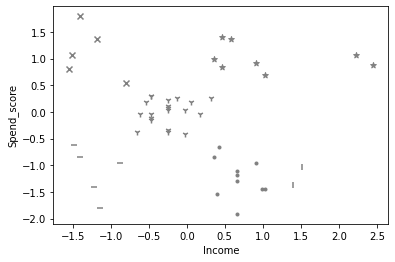

In [51]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color='gray')
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()